In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

path='/caldera/projects/usgs/water/wbeep/onhm/historical/output/seg_outflow.nc'
stream_shape='/caldera/projects/usgs/water/wbeep/onhm/GIS/streamSegsAllConus/segsAllConus.shp'
hru_shape='/caldera/projects/usgs/water/wbeep/onhm/GIS/hrusAllConus/hrusAllConus.shp'

In [2]:
    # path is the path to were there are output PRMS ncf files
    # ext is the file extention on these files
    # The python package "onhm" can be built from the source code at https://github.com/nhm-usgs/pangeo/src/onhm
    
    import onhm
    
    # For example, to see the results of the historical ONHM runs on Denali, the path would be
    path = '/caldera/projects/usgs/water/wbeep/onhm/historical/output/'
    #path = '/work/markstro/operat/setup/test/NHM-PRMS_CONUS/output/'
    ext = '.nc'
    
    ds_out = onhm.reader.get_DataSet(path, ext)
    print(ds_out)

<xarray.Dataset>
Dimensions:              (hruid: 109951, segid: 56460, time: 14569)
Coordinates:
  * hruid                (hruid) int32 1 2 3 4 5 ... 109948 109949 109950 109951
  * time                 (time) datetime64[ns] 1979-10-01T05:00:00 ... 2019-08-20T05:00:00
  * segid                (segid) int32 1 2 3 4 5 ... 56457 56458 56459 56460
Data variables:
    hru_lat              (hruid) float64 ...
    hru_lon              (hruid) float64 ...
    unused_potet         (time, hruid) float64 ...
    gwres_in             (time, hruid) float64 ...
    newsnow_out          object None
    seg_lat              (segid) float64 ...
    seg_lon              (segid) float64 ...
    segment_delta_flow   (time, segid) float64 ...
    transp_on            (time, hruid) float64 ...
    tmaxf                (time, hruid) float64 ...
    dprst_vol_open_frac  (time, hruid) float64 ...
    potet                (time, hruid) float64 ...
    hru_streamflow_out   (time, hruid) float64 ...
    pref_flo

In [3]:
    # Get the values for all HRUs for an output variable for a single time step
    var_name = 'seg_outflow'
    time_step = '2000-06-01'
    seg_outflow_sel = ds_out[var_name].sel(time=time_step)
    
    # This is an xarray DataArray
    print(seg_outflow_sel)
    # This is a numpy ndarray
    print("numpy.ndarray=", seg_outflow_sel.values)
    print('number of hrus = ', seg_outflow_sel.values.size)

<xarray.DataArray 'seg_outflow' (time: 1, segid: 56460)>
array([[9.897890e+01, 9.260713e+00, 4.024807e+01, ..., 2.626943e+01,
        3.877780e+01, 3.494299e-03]])
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01T05:00:00
  * segid    (segid) int32 1 2 3 4 5 6 7 ... 56455 56456 56457 56458 56459 56460
Attributes:
    long_name:      Streamflow leaving a segment
    standard_name:  seg_outflow
    units:          m3/s
numpy.ndarray= [[9.89789000e+01 9.26071333e+00 4.02480740e+01 ... 2.62694257e+01
  3.87778039e+01 3.49429892e-03]]
number of hrus =  56460


In [4]:
streams = gpd.read_file(stream_shape)
streams.head()

,seg_id,tosegment,region,Shape_Leng,nhm_seg,geometry
0,1,10,r01,25338.448515,1,"LINESTRING (2101948.624 2876678.641, 2101941.3..."
1,2,5,r01,28122.099979,2,"LINESTRING (2167789.031 2829021.852, 2167729.9..."
2,3,4,r01,36010.226095,3,"LINESTRING (2131936.492 2865675.020, 2131955.7..."
3,4,14,r01,7652.059834,4,"LINESTRING (2151719.943 2849594.051, 2151812.0..."
4,5,14,r01,7394.318591,5,"LINESTRING (2155981.103 2842240.715, 2155894.2..."


In [5]:
vals = seg_outflow_sel.values

streams['outflow'] = vals[0]
streams.head()

,seg_id,tosegment,region,Shape_Leng,nhm_seg,geometry,outflow
0,1,10,r01,25338.448515,1,"LINESTRING (2101948.624 2876678.641, 2101941.3...",98.978900
1,2,5,r01,28122.099979,2,"LINESTRING (2167789.031 2829021.852, 2167729.9...",9.260713
2,3,4,r01,36010.226095,3,"LINESTRING (2131936.492 2865675.020, 2131955.7...",40.248074
3,4,14,r01,7652.059834,4,"LINESTRING (2151719.943 2849594.051, 2151812.0...",42.783295
4,5,14,r01,7394.318591,5,"LINESTRING (2155981.103 2842240.715, 2155894.2...",11.350887


In [6]:
coolwarm = cm.get_cmap('coolwarm', 12)

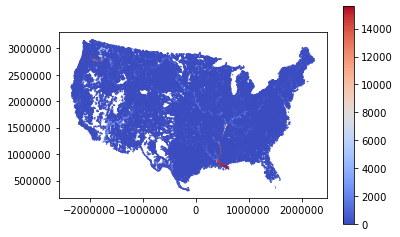

In [7]:
fig, ax = plt.subplots(1, 1)
streams.plot(column='outflow', cmap='coolwarm', ax=ax, legend=True)

In [8]:
foo = vals[0]
foo[foo < .1] = .1

foo_ln = np.log(foo) 
streams['outflow_ln'] = foo_ln
streams.head()

,seg_id,tosegment,region,Shape_Leng,nhm_seg,geometry,outflow,outflow_ln
0,1,10,r01,25338.448515,1,"LINESTRING (2101948.624 2876678.641, 2101941.3...",98.978900,4.594907
1,2,5,r01,28122.099979,2,"LINESTRING (2167789.031 2829021.852, 2167729.9...",9.260713,2.225781
2,3,4,r01,36010.226095,3,"LINESTRING (2131936.492 2865675.020, 2131955.7...",40.248074,3.695062
3,4,14,r01,7652.059834,4,"LINESTRING (2151719.943 2849594.051, 2151812.0...",42.783295,3.756148
4,5,14,r01,7394.318591,5,"LINESTRING (2155981.103 2842240.715, 2155894.2...",11.350887,2.429296


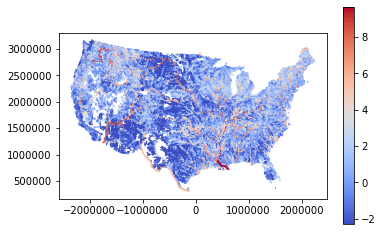

In [9]:
fig, ax = plt.subplots(1, 1)
streams.plot(column='outflow_ln', cmap='coolwarm', ax=ax, legend=True)